<a href="https://colab.research.google.com/github/Sen-Ma/PUBG-Kaggle/blob/master/Effective_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import gc
import time 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import random 
random.seed(42)

import warnings 
warnings.filterwarnings("ignore", category = DeprecationWarning)

def reload():
  gc.collect()
  df = pd.read_csv('/content/gdrive/My Drive/pubg/train_V2.csv')
  invalid_match_ids = df[df['winPlacePerc'].isna()]['matchId'].values
  df = df[-df['matchId'].isin(invalid_match_ids)]
  return df

# train = pd.read_csv("/content/gdrive/My Drive/pubg/train_V2.csv")

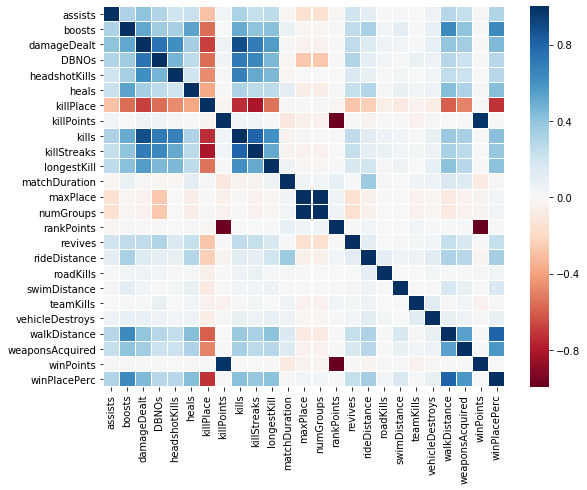

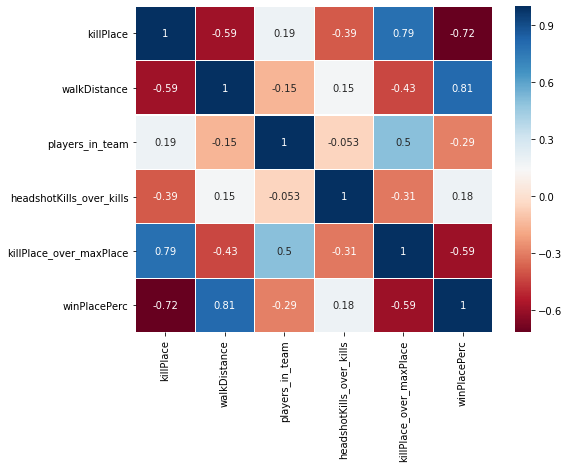

In [15]:
df = reload()
cols_to_drop = ['Id', 'groupId', 'matchId', 'matchType']
cols_to_fit = [col for col in df.columns if col not in cols_to_drop]
corr = df[cols_to_fit].corr()

plt.figure(figsize = (9,7))
sns.heatmap(
    corr,
    xticklabels = corr.columns.values,
    yticklabels = corr.columns.values,
    linecolor = 'white', 
    linewidths = 0.1,
    cmap = "RdBu"
)

plt.show()

agg = df.groupby(['groupId']).size().to_frame('players_in_team')
df = df.merge(agg,how='left', on = ['groupId'])
df['headshotKills_over_kills'] = df['headshotKills'] / df['kills']
df['headshotKills_over_kills'].fillna(0, inplace =True)
df['killPlace_over_maxPlace'] = df['killPlace'] / df['maxPlace']
df['killPlace_over_maxPlace'].fillna(0, inplace = True)
df['killPlace_over_maxPlace'].replace(np.inf, 0, inplace = True)
corr = df[['killPlace', 'walkDistance', 'players_in_team', 'headshotKills_over_kills', 'killPlace_over_maxPlace', 'winPlacePerc']].corr()

plt.figure(figsize = (8,6))
sns.heatmap(
    corr,
    xticklabels = corr.columns.values,
    yticklabels = corr.columns.values,
    annot = True,
    linecolor = 'white',
    linewidth = 0.1,
    cmap = "RdBu"
)
plt.show()

In [0]:
w  